# EDA

See a comperhansive overview and details on this dataset [here](https://www.kaggle.com/ajay1735/hmeq-data).

In this stage of The Project, the data will be explored using commonly used methods in the folowing steps:

1. **Basic Data Exploration** - Check what the data set comprises of in terms of:
    * Shape of the dataset.
    * Data Types, missing values outliers.
    * Inconsistencies (e.g. "Mr" vs "mr.").
    * Visualizations.
    * Etc.
2. **Reshaping Data** - changing the data:
    * Handeling duplications/invalid entries/outliers.
    * Data transformations.
    * Feature engineering.
    * Etc.
    
    
 
## Basic Data Exploration

Before begining the analysis the data will be split to avoid data leakage.
First the data will split to inputes and targets, and then to the Train and Test sets, and then split the training data to the validation set.
The data is small so a cross validation is needed to be representative enough to the data's actual distribution and bias and prevent overfitting.

In [167]:
import pandas as pd
import cufflinks as cf; cf.go_offline()
df = pd.read_csv("Data/hmeq.csv")
df.shape

(5960, 13)

In [168]:
df.sample(3)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5081,0,27100,33649.0,63214.0,NaN,Office,2.0,0.0,0.0,113.036737,2.0,6.0,37.837864
623,0,7800,48200.0,59000.0,DebtCon,Other,23.0,0.0,0.0,274.966667,3.0,29.0,NaN
747,1,8300,NaN,47244.0,HomeImp,Other,6.0,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
from sklearn.model_selection import train_test_split
X = df.drop("BAD", axis = 1)
y = df["BAD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25) # 25% of 80% is 20%
print(f"Train set: X_train size: {X_train2.shape}, X_train size: {y_train2.shape}")
print(f"Cross val set: X_train size: {X_val.shape}, X_train size: {y_val.shape}")
print(f"test set: X_train size: {X_test.shape}, X_train size: {y_test.shape}")

Train set: X_train size: (3576, 12), X_train size: (3576,)
Cross val set: X_train size: (1192, 12), X_train size: (1192,)
test set: X_train size: (1192, 12), X_train size: (1192,)


In [170]:
Train = X_train2.copy()
Train["BAD"] = y_train2
Train.sample(3)# display how the data looks after prep

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,BAD
2827,15800,78905.0,97628.0,DebtCon,Other,0.0,0.0,0.0,152.171137,0.0,23.0,42.218282,0
1018,9500,36114.0,45654.0,DebtCon,Office,0.0,0.0,0.0,83.333292,0.0,9.0,25.343478,1
5793,47800,47354.0,119244.0,DebtCon,Other,NaN,0.0,1.0,128.051091,0.0,21.0,NaN,1


In [171]:
#cv set
Cross_val = X_val.copy()
Cross_val["BAD"] = y_val

#test set
Test = X_test.copy()
Test["BAD"] = y_test

print(f"Train set shape: {Train.shape}, Cross val set shape: {Cross_val.shape}, Test set shape: {Test.shape}")


Train set shape: (3576, 13), Cross val set shape: (1192, 13), Test set shape: (1192, 13)


Now the data is split to 3 sets:

* **Training:** 60%

* **Cross validation:** 20%

* **Testing:** 20%

Now the main focus will be on the train set

## Basic Data Exploration

Here we will try to better understand the data:

In [172]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 3646 to 3099
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     3576 non-null   int64  
 1   MORTDUE  3246 non-null   float64
 2   VALUE    3510 non-null   float64
 3   REASON   3411 non-null   object 
 4   JOB      3391 non-null   object 
 5   YOJ      3261 non-null   float64
 6   DEROG    3138 non-null   float64
 7   DELINQ   3213 non-null   float64
 8   CLAGE    3390 non-null   float64
 9   NINQ     3270 non-null   float64
 10  CLNO     3439 non-null   float64
 11  DEBTINC  2825 non-null   float64
 12  BAD      3576 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 391.1+ KB


It seems the data has null columns, numeric and categoric data types.

Let's see how much data is missing for all columns:

In [173]:
#missing data
total = Train.isnull().sum().sort_values(ascending=False)
percent = round(Train.isnull().sum()/Train.shape[0]*100,2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
DEBTINC,751,21.00
DEROG,438,12.25
DELINQ,363,10.15
MORTDUE,330,9.23
YOJ,315,8.81
NINQ,306,8.56
CLAGE,186,5.20
JOB,185,5.17
REASON,165,4.61
CLNO,137,3.83


### Loan Amount
Let's see the distribution of the LOAN column:

In [174]:
Train.LOAN.describe() # number of unique values for LOANS that has been requested

count     3576.000000
mean     18634.703579
std      11278.495700
min       1100.000000
25%      11200.000000
50%      16400.000000
75%      23300.000000
max      89200.000000
Name: LOAN, dtype: float64

We see that Loans have a high variance and the mean is higher than the median,
let's plot the column:

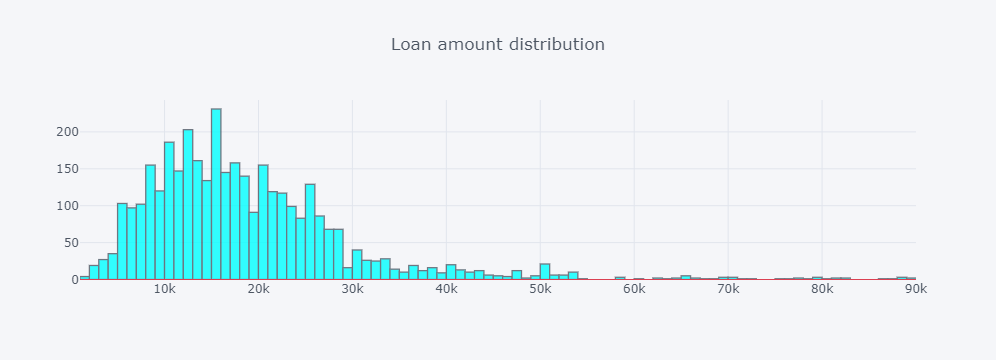

In [175]:
Train.LOAN.iplot(kind='hist', title = 'Loan amount distribution', hline=(0), color = ['cyan'])

### Target Variable

Let's see the distribution of the target column:

In [176]:
Train.BAD.value_counts()/Train.shape[0]*100,2

(0    80.145414
 1    19.854586
 Name: BAD, dtype: float64,
 2)

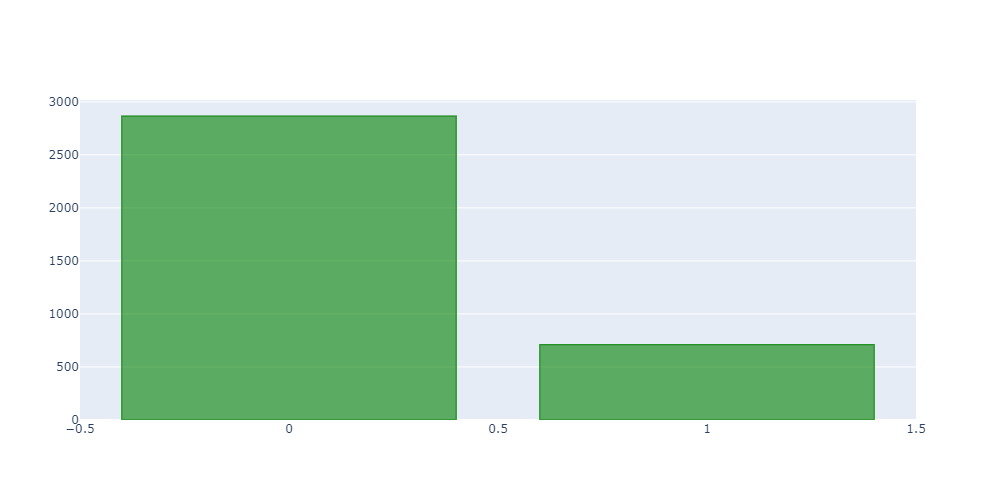

In [177]:
target_layout = cf.Layout(
    height=500,
    width=400
)
Train.BAD.value_counts().iplot(kind='bar',layout = target_layout, title = 'Default Flag distribution', hline=(0),colors=['green'])

### Numeric Variables

Now we will inspect the other numeric varaibles:

In [178]:
Floats = Train.select_dtypes(include = "float64").columns.tolist() #float variables
Train[Floats].describe()

,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3246.000000,3510.000000,3261.000000,3138.000000,3213.000000,3390.000000,3270.000000,3439.000000,2825.000000
mean,73740.045733,101109.482046,9.003757,0.264181,0.444756,178.988379,1.175841,21.204129,33.760506
std,44226.411677,54723.776266,7.589593,0.862567,1.101262,83.856675,1.749701,9.897507,8.980865
min,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.720295
25%,46438.250000,66263.500000,3.000000,0.000000,0.000000,115.006221,0.000000,15.000000,29.188980
50%,65300.500000,89594.500000,7.000000,0.000000,0.000000,172.525778,1.000000,20.000000,34.784870
75%,92605.500000,120158.750000,13.000000,0.000000,0.000000,230.717269,2.000000,26.000000,39.025926
max,399550.000000,854112.000000,41.000000,10.000000,13.000000,648.328493,17.000000,71.000000,203.312149


now we will visualize this data:

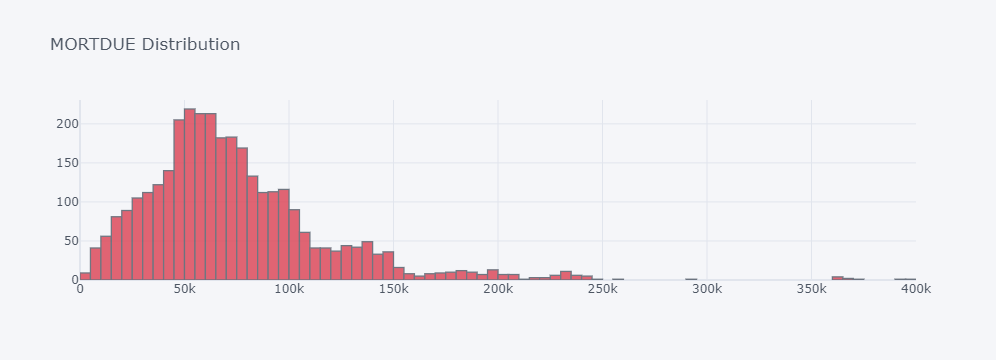

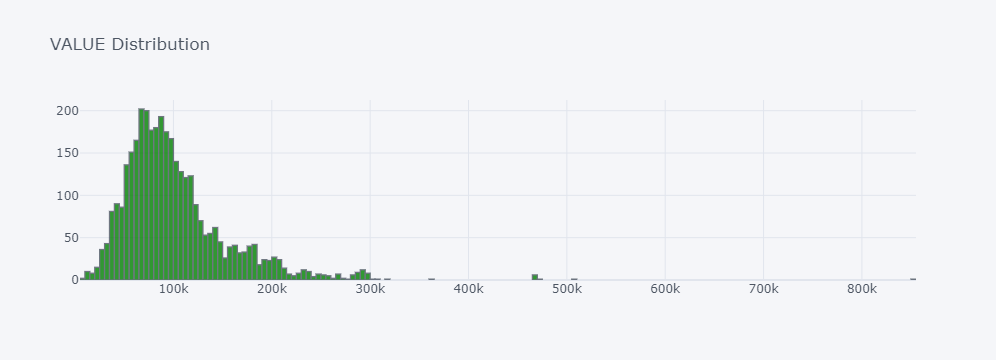

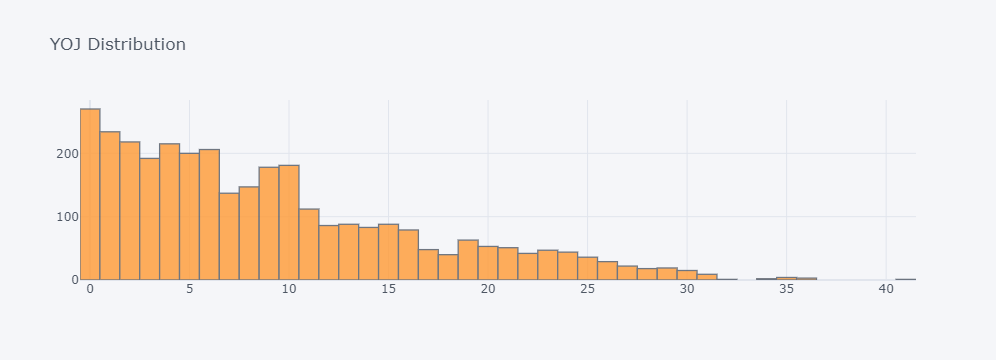

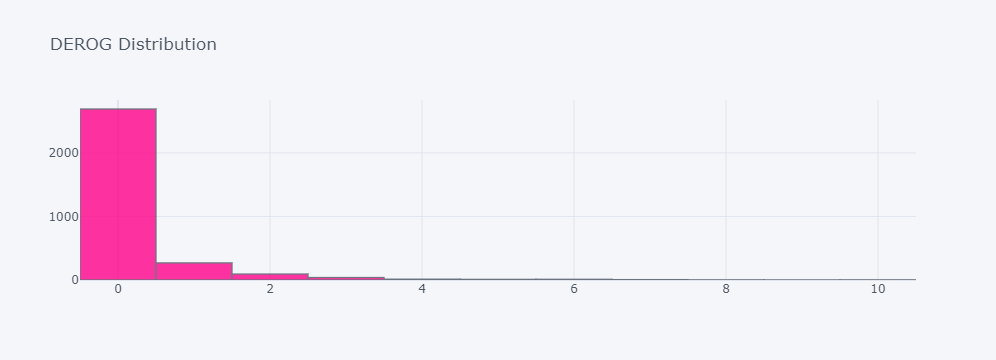

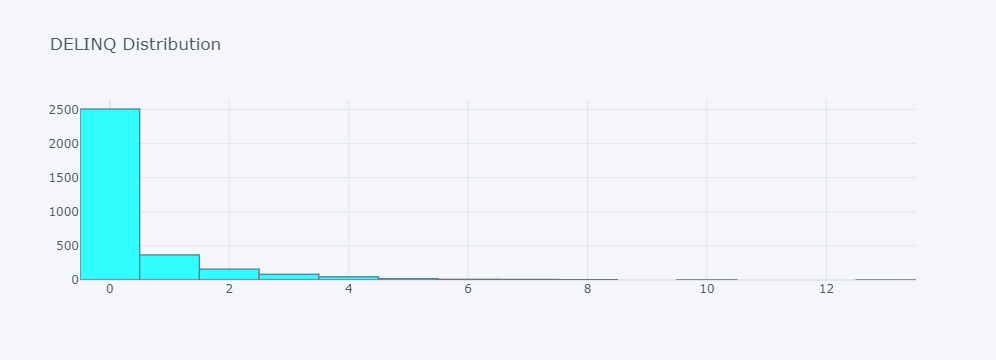

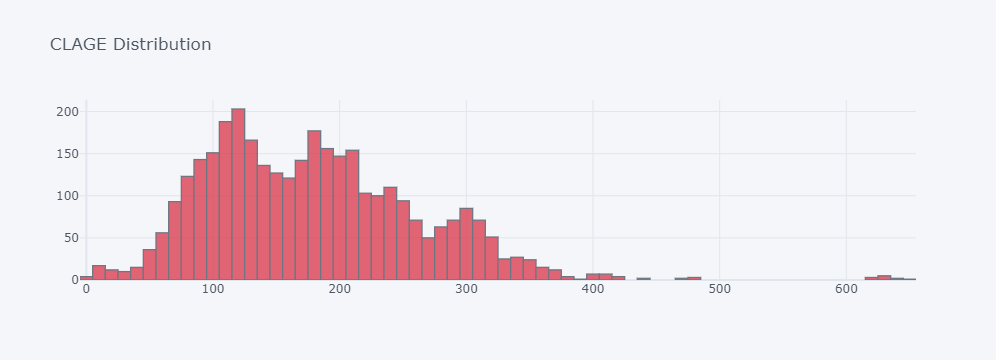

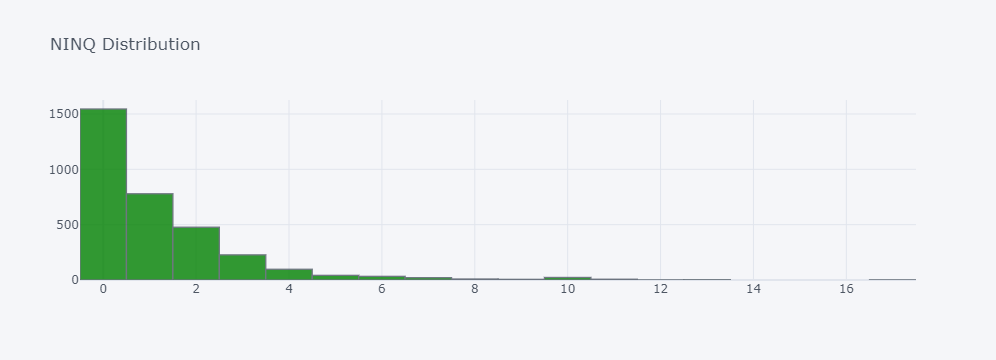

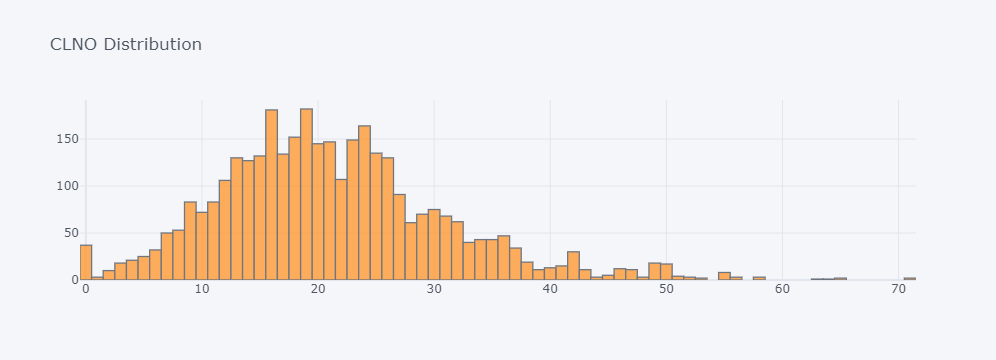

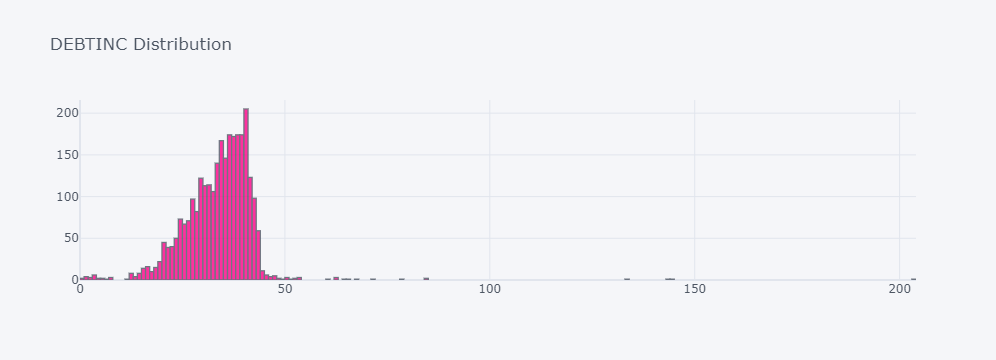

In [179]:
colors = ["red","green","orange","pink","cyan","red","green","orange","pink"]
for color,col in enumerate(Floats):    
    Train[col].iplot(kind='histogram',title = f"{col} Distribution",color = colors[color], filename='histogram-subplots')

### Categoric Variables

Now we will inspect categoric variables:

In [180]:
Cats = Train.select_dtypes(include = "object").columns.tolist()[::-1] #float variables
Train[Cats].describe(include = "object")

,JOB,REASON
count,3391,3411
unique,6,2
top,Other,DebtCon
freq,1432,2373


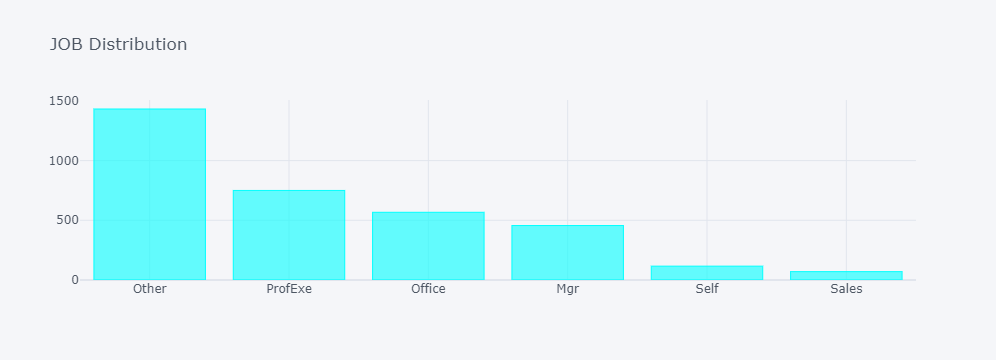

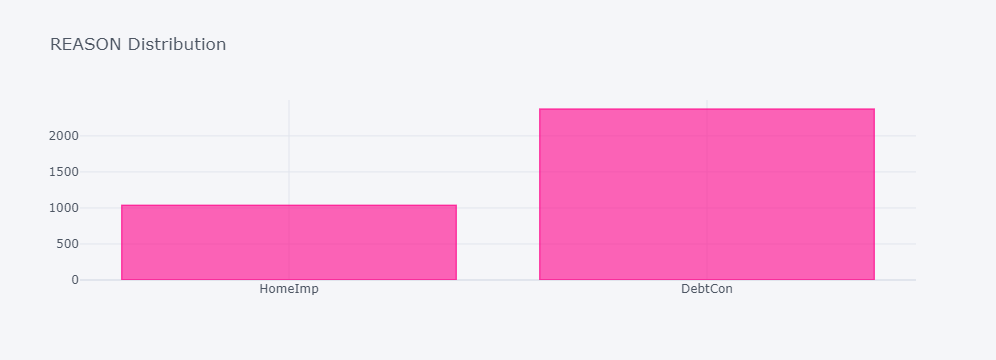

In [181]:
colors = ["cyan","pink"]
for i,col in enumerate(Cats):    
    Train[col].value_counts().sort_values(ascending = bool(i)).iplot(kind='bar',title = f"{col} Distribution",color = colors[i], filename='bar-subplots')

#### Insights so far:
1. Target variable:
    * **BAD** - Appears to be about 20-80 split in favor of the Loan paid category (0).
2. Inputs (Continuous):
    * **LOAN, MORTDUE, VALUE, CLAGE, DEBTINC** - Appears to be right skewd (mean>median>mode).
3. Inputs (Discrete):
    * **YOJ, DEROG, DELINQ, NINQ, CLNO** - Most of the data are in the lower values area in all these inputs.
4. Inputs (Nominal):
    * **JOB** - Alot of Jobs are classified as Other, the rest of the categories are significantly lower.
    * **REASON** - Most of the reasons for loan requests are for debt debt consolidation.


### Relation to target
Now an analysis of how the inputs are each distributed in relation to the targed `BAD`:

**LOAN**

In [182]:
Train[['LOAN','BAD']].groupby(['BAD']).describe()

LOAN                                                                 \
      count          mean           std     min      25%      50%      75%   
BAD                                                                          
0    2866.0  19100.942080  11146.918707  2000.0  11900.0  16900.0  23600.0   
1     710.0  16752.676056  11613.849881  1100.0   8900.0  14850.0  21400.0   

              
         max  
BAD           
0    89200.0  
1    77400.0

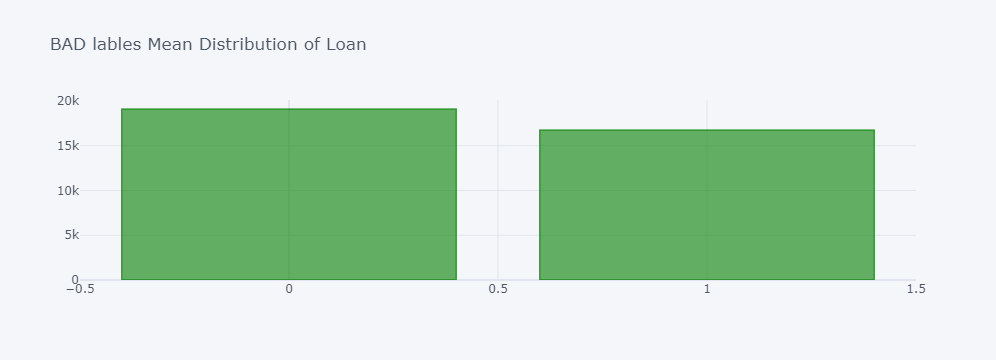

In [183]:
Train[['LOAN','BAD']].groupby(['BAD']).mean().iplot(kind='bar',title = "BAD lables Mean Distribution of Loan",color = ["green"])

### Continuous Variables

In [184]:
pd.set_option('display.max_columns', 32)#show all columns.
Continuous = ["MORTDUE", "VALUE", "CLAGE", "DEBTINC"]
Train[Continuous + ["BAD"]].groupby(['BAD']).describe()

MORTDUE                                                                  \
      count          mean           std     min      25%       50%      75%   
BAD                                                                           
0    2605.0  74742.725631  43470.252054  2619.0  47865.0  66938.00  93542.0   
1     641.0  69665.192168  46990.625327  2063.0  39441.0  60971.32  86000.0   

                VALUE                                                         \
          max   count           mean           std     min      25%      50%   
BAD                                                                            
0    371003.0  2861.0  102402.217815  52597.875282  8000.0  67475.0  91004.0   
1    399550.0   649.0   95410.688459  62979.279623  9100.0  58995.0  82248.0   

                          CLAGE                                               \
          75%       max   count        mean        std       min         25%   
BAD                                                                            
0    121310.0  471827.0  2731.0  186.024501  84.267668  0.486711  119.700000   
1    116468.0  854112.0   659.0  149.829577  75.491332  0.000000   97.182147   

                                        DEBTINC                        \
            50%         75%         max   count       mean        std   
BAD                                                                     
0    179.566667  239.377635  648.328493  2585.0  33.258753   6.986820   
1    134.633579  190.635205  475.800000   240.0  39.164797  19.829019   

                                                           
          min        25%       50%        75%         max  
BAD                                                        
0    0.720295  29.007208  34.54081  38.801877   45.569843  
1    0.838118  32.358189  37.97033  42.708943  203.312149

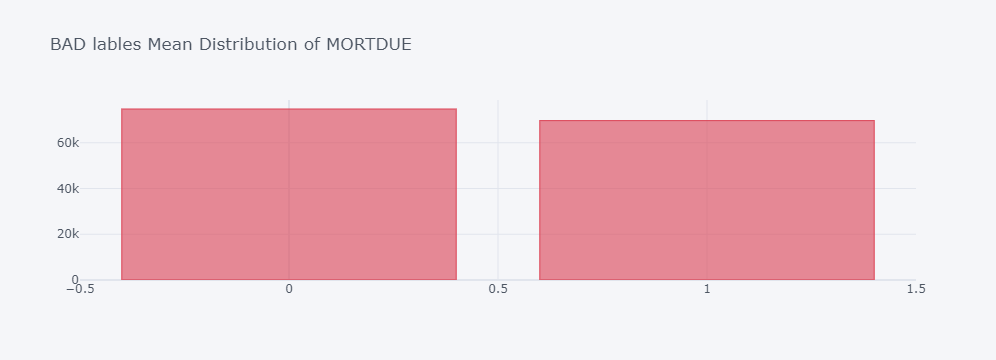

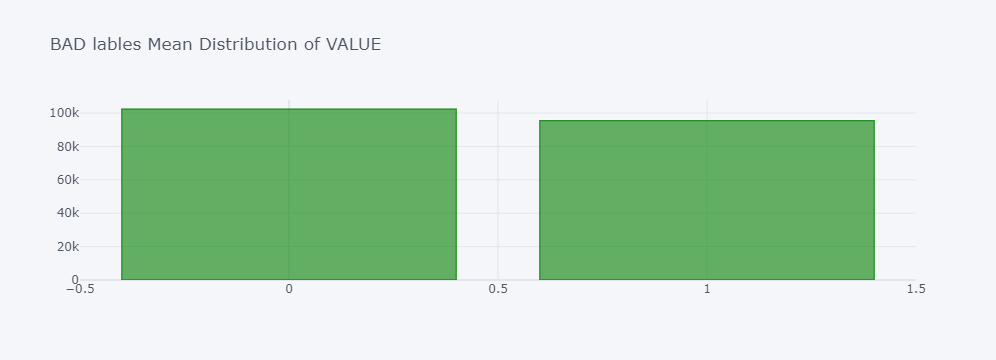

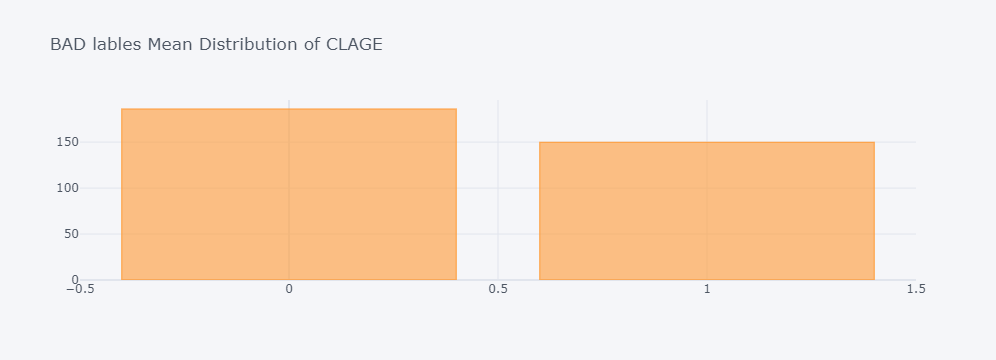

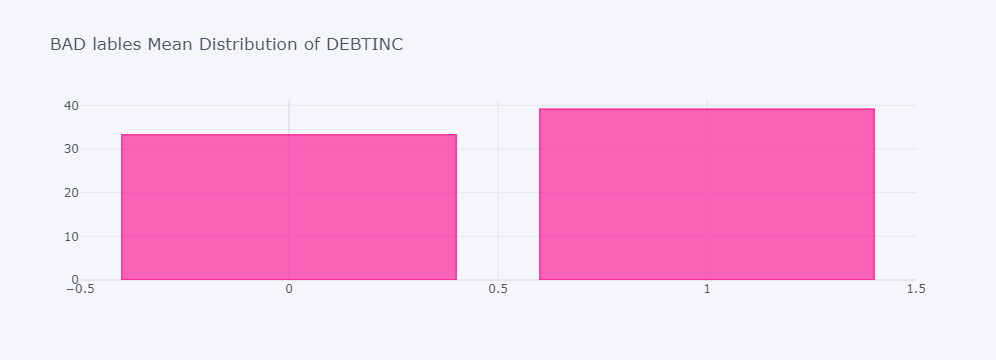

In [185]:
colors = ["red","green","orange","pink"]
for i,col in enumerate(Continuous):
    Train[[col,'BAD']].groupby(['BAD']).mean().iplot(kind='bar',title = f"BAD lables Mean Distribution of {col}",color = [colors[i]])

### Discrete Variables

In [186]:
pd.set_option('display.max_columns', 40)#show all columns.
Discrete = ["YOJ", "DEROG", "DELINQ", "NINQ", "CLNO"]
Train[Discrete + ["BAD"]].groupby(['BAD']).describe()

YOJ                                                  DEROG            \
      count      mean       std  min  25%  50%   75%   max   count      mean   
BAD                                                                            
0    2591.0  9.241181  7.694504  0.0  3.0  7.0  14.0  36.0  2484.0  0.139694   
1     670.0  8.085597  7.100544  0.0  2.0  6.0  12.0  41.0   654.0  0.737003   

                                         DELINQ                                \
          std  min  25%  50%  75%   max   count      mean       std  min  25%   
BAD                                                                             
0    0.534182  0.0  0.0  0.0  0.0   6.0  2550.0  0.245882  0.678895  0.0  0.0   
1    1.485388  0.0  0.0  0.0  1.0  10.0   663.0  1.209653  1.836134  0.0  0.0   

                       NINQ                                                \
     50%  75%   max   count      mean       std  min  25%  50%  75%   max   
BAD                                                                         
0    0.0  0.0   5.0  2606.0  1.036071  1.585758  0.0  0.0  0.5  2.0  11.0   
1    0.0  2.0  13.0   664.0  1.724398  2.199192  0.0  0.0  1.0  2.0  17.0   

       CLNO                                                     
      count       mean        std  min   25%   50%   75%   max  
BAD                                                             
0    2765.0  21.230380   9.433641  0.0  15.0  20.0  26.0  56.0  
1     674.0  21.096439  11.615479  0.0  13.0  20.0  27.0  71.0

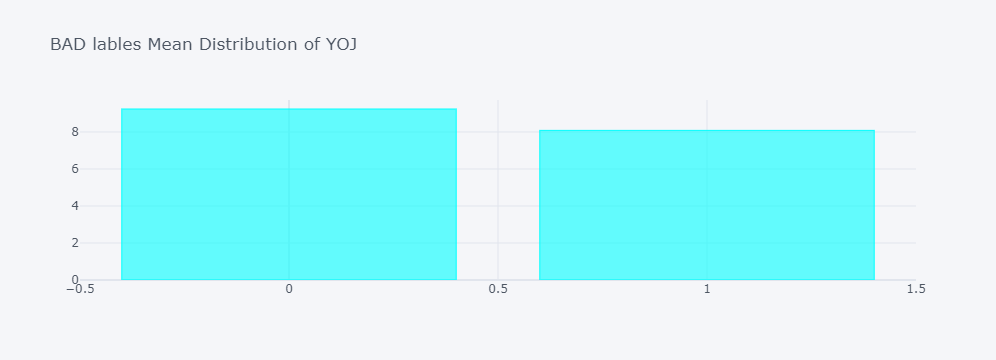

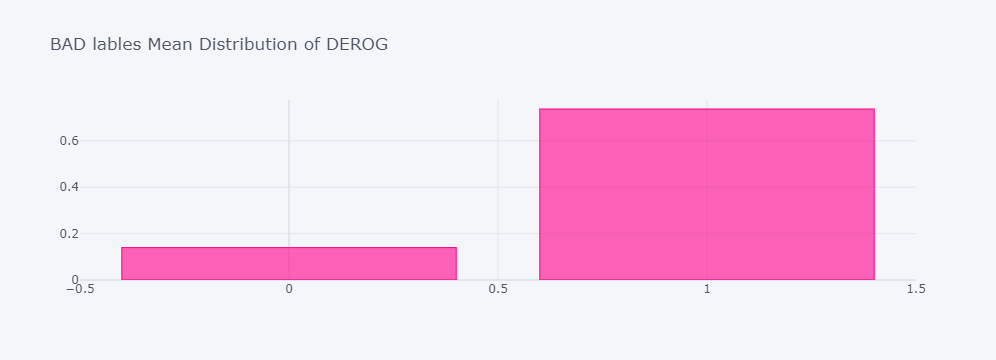

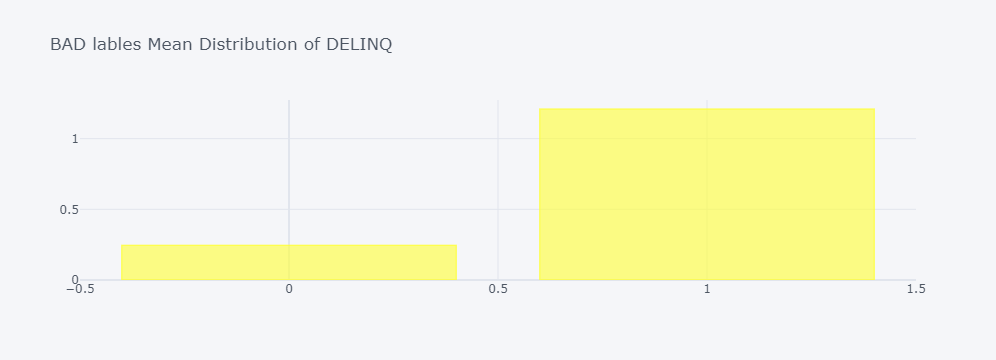

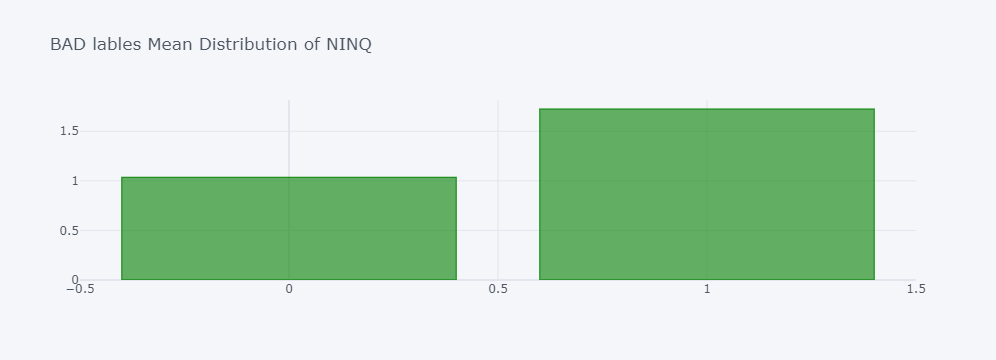

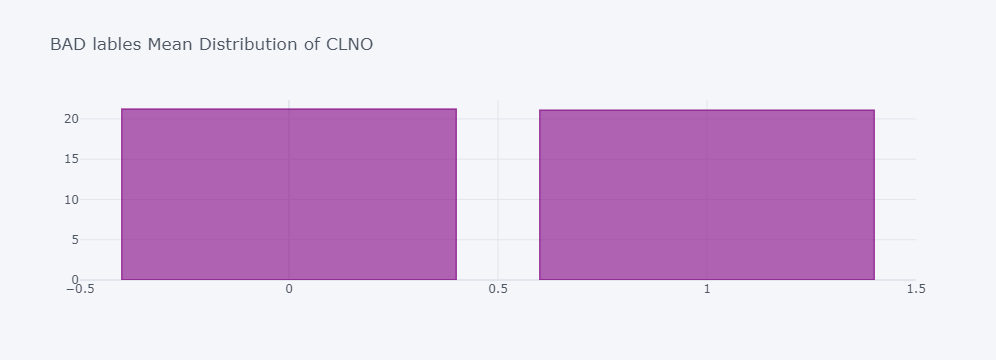

In [187]:
colors = ["purple","green","yellow","pink","cyan"][::-1]
for i,col in enumerate(Discrete):
    Train[[col,'BAD']].groupby(['BAD']).mean().iplot(kind='bar',title = f"BAD lables Mean Distribution of {col}",color = [colors[i]])

In [188]:
#DEROG
default_derog = Train[Train['BAD']==1]['DEROG'].value_counts().sort_values(ascending = False)
paid_derog = Train[Train['BAD']==0]['DEROG'].value_counts()
bad_derog = pd.DataFrame([default_derog,paid_derog])
bad_derog.index = ['Default','Paid']
bad_derog.fillna(0)

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Default,438.0,106.0,50.0,26.0,11.0,5.0,7.0,6.0,2.0,1.0,2.0
Paid,2253.0,163.0,44.0,13.0,2.0,5.0,4.0,0.0,0.0,0.0,0.0


### Categoric (nominal) Variables

In [189]:
default_job = Train[Train['BAD']==1]['JOB'].value_counts().sort_values(ascending = False)
paid_job = Train[Train['BAD']==0]['JOB'].value_counts()
job_bad = pd.DataFrame([default_job,paid_job])
job_bad.index = ['Default','Paid']
job_bad

,Other,ProfExe,Mgr,Office,Self,Sales
Default,331,114,107,77,39,23
Paid,1101,636,349,490,77,47


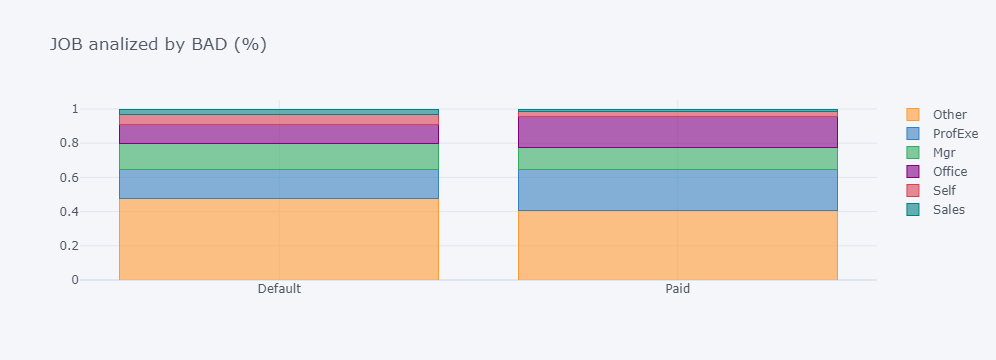

In [190]:
#normalize
default_job_n = Train[Train['BAD']==1]['JOB'].value_counts(normalize=True).sort_values(ascending = False)
paid_job_n = Train[Train['BAD']==0]['JOB'].value_counts(normalize=True)
job_bad_n = pd.DataFrame([default_job_n,paid_job_n])
job_bad_n.index = ['Default','Paid']
job_bad_n.iplot(kind='bar',barmode='stack',title = "JOB analized by BAD (%)")

In [191]:
default_reason = Train[Train['BAD']==1]['REASON'].value_counts().sort_values(ascending = False)
paid_reason = Train[Train['BAD']==0]['REASON'].value_counts()
reason_bad = pd.DataFrame([default_reason,paid_reason])
reason_bad.index = ['Default','Paid']
reason_bad = reason_bad.T
reason_bad

,Default,Paid
DebtCon,443,1930
HomeImp,236,802


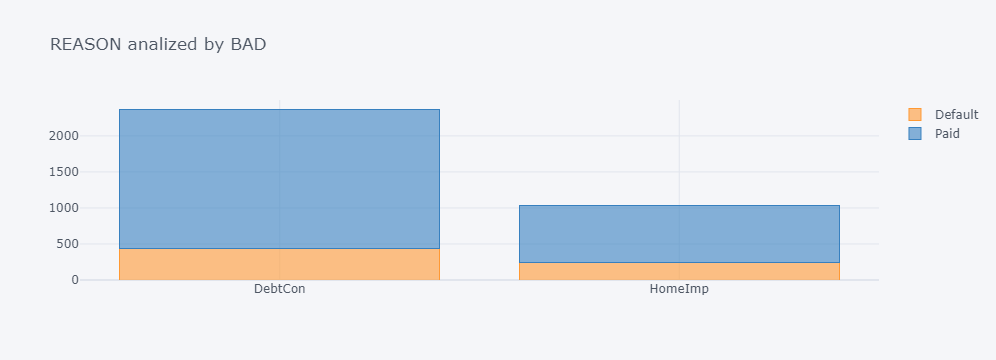

In [192]:
reason_bad.iplot(kind='bar',barmode='stack',title = "REASON analized by BAD")

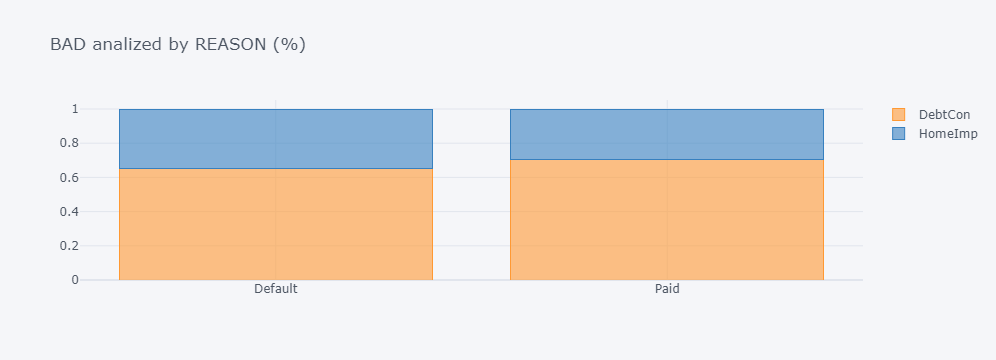

In [193]:
default_reason_n = Train[Train['BAD']==1]['REASON'].value_counts(normalize=True).sort_values(ascending = False)
paid_reason_n = Train[Train['BAD']==0]['REASON'].value_counts(normalize=True)
reason_bad_n = pd.DataFrame([default_reason_n,paid_reason_n])
reason_bad_n.index = ['Default','Paid']
reason_bad_n.iplot(kind='bar',barmode='stack',title = "BAD analized by REASON (%)")

#### Insights:
1. Inputs (Continuous):
    * **LOAN** - Defaulters on average takes a smaller loan than none defaulters.
    * **MORTDUE** - Defaulters on average have smaller amount due on existing mortgage.
    * **VALUE** - Defaulters house value is smaller on average.
    * **CLAGE** - Defaulters average credit traidline is higher on average than none defaulters.
    * **DEBTINC** - Defaulters Debt to income ratio is smaller on average than none defaulters.
2. inputs (Discrete):
    * **YOJ** - Defaulters on average have less years of expirience in the current job their in.
    * **DEROG** - Dost of the loan owners dont have any derogatory mark but the ones who do are mostly defaulters 
    * **DELINQ** - Most of the loan owners dont have any delinq credit lines but the ones who do are mostly defaulters.
    * **NINQ** - Defaulters on average have more recent credit lines then none defaulters.
    * **CLNO** - Defaulters on average have about the same amount of credit lines then none defaulters.
    
3. inputs (Nominal):
    * **JOB** - Jobs like Mgr and self have more defaulters than the original distribution.
    * **REASON** - Home improvement have a slighly higher default rate than debt consolidation.


 # Conclusion for EDA
 
 The data is not optimal for making classifications right away.
 In the predictions notebook, the data will go through preprocessing and feature engineering based on insights from this analysis
 and predictions will be made with a few baselines for comparison between a few models.